In [1]:
from signal import signal
from matplotlib.offsetbox import HPacker
import scipy
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity
from pathlib import Path
import pandas as pd

function to calculate coherence at theta gamma frequencies

In [2]:


def theta_beta(pathsHPC,pathsPFC):
    sampling_frequency = 1000
    time_halfbandwidth_product = 5
    n_trials = len(pathsHPC)
    theta=[]
    beta=[]

    for i in range(n_trials):
        dataHPC = scipy.io.loadmat(pathsHPC[i])
        dataPFC = scipy.io.loadmat(pathsPFC[i])
    
        current_dataHPC = dataHPC['HPC']
        current_dataPFC = dataPFC['PFC']
        n_time_samples = len(current_dataHPC)

        time = np.arange(0, n_time_samples)/sampling_frequency
        signal1 = np.zeros(n_time_samples)
        signal2 = np.zeros(n_time_samples)
        signal1 = current_dataHPC
        signal2 = current_dataPFC

        signals = np.stack((signal1, signal2), axis=-1)
    
        m = Multitaper(
        signals,
        sampling_frequency=sampling_frequency,
        time_halfbandwidth_product=time_halfbandwidth_product,
        start_time=time[0],
        time_window_duration=10,
        time_window_step=1
        )

        c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

        delay_theta, slope, r_value= c.group_delay(
        frequencies_of_interest=list(range(5,12)), frequency_resolution=m.frequency_resolution
        )

        delay_beta, slope, r_value= c.group_delay(
        frequencies_of_interest=list(range(15,30)), frequency_resolution=m.frequency_resolution
        )
        
        D1=np.nanmean(delay_theta[:,0,1]) #hippocampus as leading signal
        D2=np.nanmean(delay_beta[:,0,1])  #hippocampus as leading signal

        theta.append(D1)
        beta.append(D2)
    return theta, beta

In [3]:
def average(theta,beta):
    # Calculate the average
    theta_mean = np.nanmean(theta)
    beta_mean = np.nanmean(beta)


    # Calculate the standard error of mean
    t=pd.Series(theta)
    g=pd.Series(beta)
    theta_std = (np.nanstd(theta))/(np.sqrt(t.count()))
    beta_std = (np.nanstd(beta))/(np.sqrt(g.count()))

    return theta_mean,beta_mean,theta_std,beta_std

In [4]:
#CON
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD1_CON_26-27_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD1_CON_26-27_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)

theta,beta = theta_beta(pathsHPC,pathsPFC)
theta_mean_con,beta_mean_con,theta_std_con,beta_std_con = average(theta,beta)

#OD
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD2_OD_28-29_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD2_OD_28-29_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)

theta,beta = theta_beta(pathsHPC,pathsPFC)
theta_mean_od,beta_mean_od,theta_std_od,beta_std_od = average(theta,beta)

#OR
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD3_OR_30-31_07_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD3_OR_30-31_07_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)

theta,beta = theta_beta(pathsHPC,pathsPFC)
theta_mean_or,beta_mean_or,theta_std_or,beta_std_or = average(theta,beta)

#HC
pathsHPC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD4_HC_01_08_2018').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('D:/users/Desktop/sem7/internship/NEW/1/Rat_OS_Ephys_RGS14_Rat1_57986_SD4_HC_01_08_2018').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)

theta,beta = theta_beta(pathsHPC,pathsPFC)
theta_mean_hc,beta_mean_hc,theta_std_hc,beta_std_hc = average(theta,beta)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12104\3317868459.py:44: RuntimeWarning: Mean of empty slice
  D2=np.nanmean(delay_beta[:,0,1])  #hippocampus as leading signal
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12104\3317868459.py:43: RuntimeWarning: Mean of empty slice
  D1=np.nanmean(delay_theta[:,0,1]) #hippocampus as leading signal


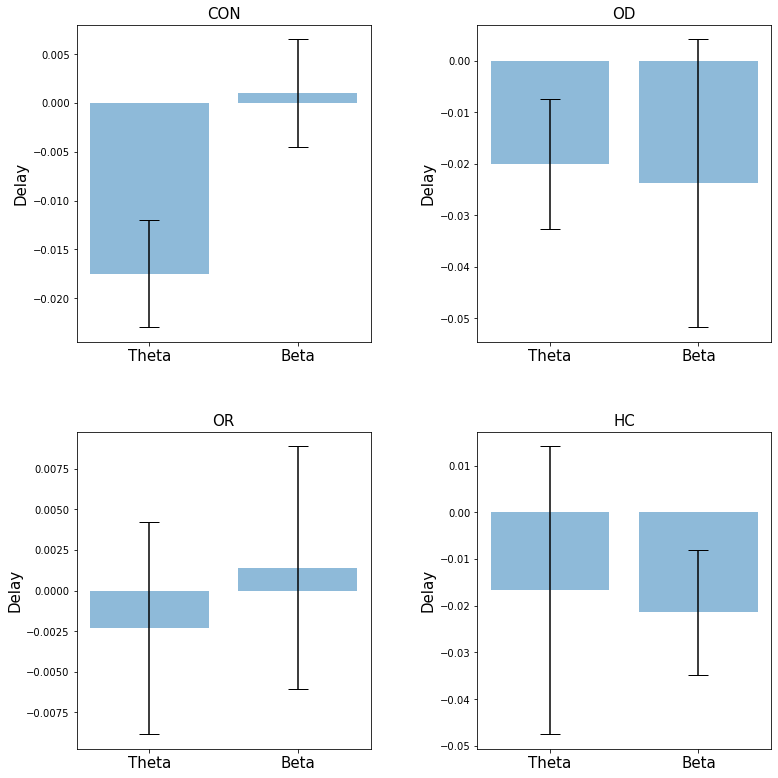

In [13]:
# Create lists for the plot
materials = ['Theta', 'Beta']
x_pos = np.arange(len(materials))

font = 15

#plot
fig,ax =plt.subplots(2,2, figsize = (12,12))

#CON
ax[0,0].bar(x_pos, [theta_mean_con, beta_mean_con], yerr=[theta_std_con, beta_std_con], align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0,0].set_ylabel('Delay', fontsize=font)
ax[0,0].set_xticks(x_pos)
ax[0,0].set_xticklabels(materials,fontsize=font)
ax[0,0].set_title('CON',fontsize=font)
ax[0,0].yaxis.grid(True)

ax[0,1].bar(x_pos, [theta_mean_od, beta_mean_od], yerr=[theta_std_od, beta_std_od], align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0,1].set_ylabel('Delay',fontsize=font)
ax[0,1].set_xticks(x_pos)
ax[0,1].set_xticklabels(materials,fontsize=font)
ax[0,1].set_title('OD',fontsize=font)
ax[0,1].yaxis.grid(True)

ax[1,0].bar(x_pos, [theta_mean_or, beta_mean_or], yerr=[theta_std_or, beta_std_or], align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1,0].set_ylabel('Delay',fontsize=font)
ax[1,0].set_xticks(x_pos)
ax[1,0].set_xticklabels(materials,fontsize=font)
ax[1,0].set_title('OR',fontsize=font)
ax[1,0].yaxis.grid(True)

ax[1,1].bar(x_pos, [theta_mean_hc, beta_mean_hc], yerr=[theta_std_hc, beta_std_hc], align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1,1].set_ylabel('Delay',fontsize=font)
ax[1,1].set_xticks(x_pos)
ax[1,1].set_xticklabels(materials,fontsize=font)
ax[1,1].set_title('HC',fontsize=font)
ax[1,1].yaxis.grid(True)

fig.tight_layout(pad=5.0)


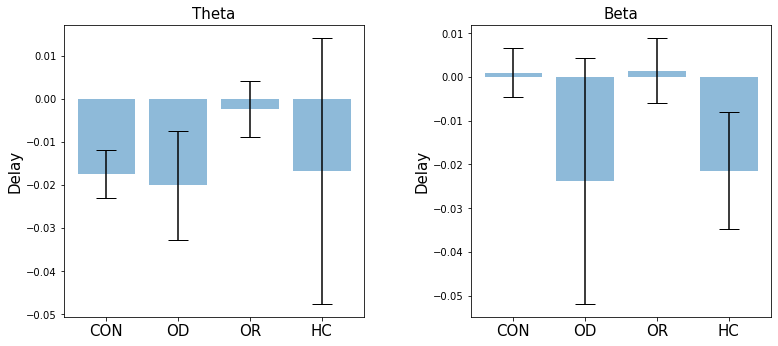

In [21]:
# all theta and beta coherence of four conditions together 

materials =["CON","OD","OR","HC"]
x_pos = np.arange(len(materials))
theta_mean = [theta_mean_con,theta_mean_od,theta_mean_or,theta_mean_hc]
beta_mean = [beta_mean_con,beta_mean_od,beta_mean_or,beta_mean_hc]
theta_std = [theta_std_con,theta_std_od,theta_std_or,theta_std_hc]
beta_std = [beta_std_con,beta_std_od,beta_std_or,beta_std_hc]

font = 15
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].bar(x_pos,theta_mean, yerr=theta_std,align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('Delay',fontsize=font)
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(materials,fontsize=font)
ax[0].set_title('Theta',fontsize=font)
ax[0].yaxis.grid(True)

ax[1].bar(x_pos,beta_mean, yerr=beta_std,align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_ylabel('Delay',fontsize=font)
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(materials,fontsize=font)
ax[1].set_title('Beta',fontsize=font)
ax[1].yaxis.grid(True)

fig.tight_layout(pad=5.0)


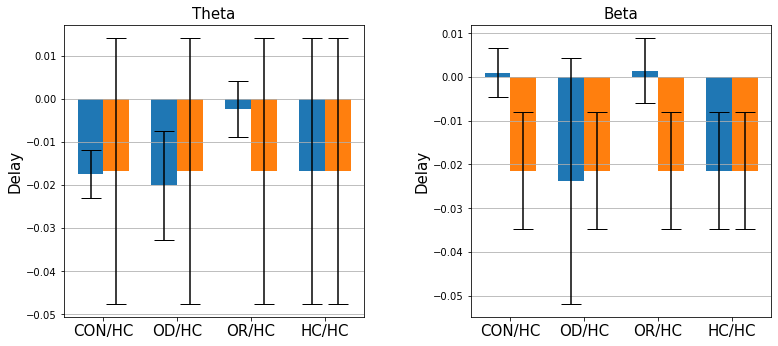

In [27]:
theta_hc_mean = [theta_mean[-1]]*4
theta_hc_std = [theta_std[-1]]*4

beta_hc_mean = [beta_mean[-1]]*4
beta_hc_std = [beta_std[-1]]*4


ind = np.arange(4)  # the x locations for the groups
width = 0.35       # the width of the bars

font = 15
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].bar(ind, theta_mean, width, yerr=theta_std, align='center', ecolor='black', capsize=10)
ax[0].bar(ind+width, theta_hc_mean, width, yerr=theta_hc_std, align='center', ecolor='black', capsize=10)
ax[0].set_ylabel('Delay',fontsize=font)
ax[0].set_title('Theta',fontsize=font)
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels( ('CON/HC', 'OD/HC', 'OR/HC', 'HC/HC'),fontsize=font )
ax[0].yaxis.grid(True)

ax[1].bar(ind, beta_mean, width, yerr=beta_std, align='center', ecolor='black', capsize=10)
ax[1].bar(ind+width, beta_hc_mean, width, yerr=beta_hc_std, align='center', ecolor='black', capsize=10)
ax[1].set_ylabel('Delay',fontsize=font)
ax[1].set_title('Beta',fontsize=font)
ax[1].set_xticks(ind + width / 2)
ax[1].set_xticklabels( ('CON/HC', 'OD/HC', 'OR/HC', 'HC/HC'),fontsize=font )
ax[1].yaxis.grid(True)


fig.tight_layout(pad=5.0)
